In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

### RSA For Hippocampal connections in the brain


In [2]:
df = pd.read_excel('../data/br2f_topographic_data.xlsx', header=0, index_col=0)

# define left hemisphere
brain_regions = df.index.to_numpy()
left_hemisphere = brain_regions[:392]
df_left_hemisphere = df[left_hemisphere]
df_left_hemisphere = df_left_hemisphere.head(392)

hippocampus_regions = np.array(['DG','CA3','CA2','CA1v','CA1d','SUBv','SUBd','PAR', 'PRE', 'POST']) 

In [3]:
# reduce the left hemisphere dataframe to only include hypothalamus and hippocampal regions
df_hipp_connectivity = df_left_hemisphere[df_left_hemisphere.index.isin(hippocampus_regions)]

In [4]:
df_hipp_connectivity

,GPm,GPl,SI,MA,MS,NDB,TRS,BSTam,BSTfu,BSTv,...,NTSco,AP,GR,Z,CU,ACU,PAT,SPVO,SPVI,SPVC
Abbr.,,,,,,,,,,,,,,,,,,,,,
DG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA3,0,0,1,0,2,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA1v,0,0,2,0,3,3,0,1,1,2,...,0,0,0,0,0,0,0,0,0,0
CA1d,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SUBv,0,0,2,0,0,0,0,4,1,2,...,0,0,0,0,0,0,0,0,0,0
SUBd,0,0,0,0,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PRE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
POST,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# remove all columns with less than 2 nonzero values
df_filtered = df_hipp_connectivity.loc[:,df_hipp_connectivity.apply(np.count_nonzero, axis=0) >=2]

In [34]:
df_filtered

,SI,MS,NDB,BSTam,BSTfu,BSTv,BSTal,BSTov,BSTpr,BSTif,...,REc,PVT,PT,AV,AD,IAM,LD,VTA,PAGrn,DTN
Abbr.,,,,,,,,,,,,,,,,,,,,,
DG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA3,1,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA1v,2,3,3,1,1,2,1,1,2,4,...,1,1,1,0,0,1,0,1,1,0
CA1d,0,0,1,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,1,0,0
SUBv,2,0,0,4,1,2,2,1,1,4,...,4,5,2,0,0,1,0,2,1,1
SUBd,0,2,2,0,0,0,0,0,0,0,...,3,0,2,3,0,4,0,1,0,1
PRE,0,0,0,0,0,0,0,0,0,0,...,4,0,0,6,2,0,6,0,0,0
POST,0,0,0,0,0,0,0,0,0,0,...,2,0,0,2,6,0,7,0,0,0


In [35]:
# exclude hippocampus columns (we don't care about self-connections within the hippocampus)
df_filtered = df_filtered.drop(hippocampus_regions, axis=1)

In [36]:
df_filtered

,SI,MS,NDB,BSTam,BSTfu,BSTv,BSTal,BSTov,BSTpr,BSTif,...,REc,PVT,PT,AV,AD,IAM,LD,VTA,PAGrn,DTN
Abbr.,,,,,,,,,,,,,,,,,,,,,
DG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA3,1,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA1v,2,3,3,1,1,2,1,1,2,4,...,1,1,1,0,0,1,0,1,1,0
CA1d,0,0,1,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,1,0,0
SUBv,2,0,0,4,1,2,2,1,1,4,...,4,5,2,0,0,1,0,2,1,1
SUBd,0,2,2,0,0,0,0,0,0,0,...,3,0,2,3,0,4,0,1,0,1
PRE,0,0,0,0,0,0,0,0,0,0,...,4,0,0,6,2,0,6,0,0,0
POST,0,0,0,0,0,0,0,0,0,0,...,2,0,0,2,6,0,7,0,0,0


In [37]:
rsa_matrix = df_filtered.corr()

In [38]:
rsa_matrix

,SI,MS,NDB,BSTam,BSTfu,BSTv,BSTal,BSTov,BSTpr,BSTif,...,REc,PVT,PT,AV,AD,IAM,LD,VTA,PAGrn,DTN
SI,1.000000,0.507415,0.460653,0.772539,0.930261,0.930261,0.871694,0.930261,0.871694,0.930261,...,0.040982,0.745868,0.538462,-0.394430,-0.365596,0.103362,-0.308946,0.647150,0.930261,0.310087
MS,0.507415,1.000000,0.962239,-0.037748,0.363636,0.363636,0.127779,0.363636,0.553707,0.363636,...,-0.258320,-0.072889,0.394656,-0.115636,-0.375140,0.515152,-0.317012,0.203279,0.363636,0.136364
NDB,0.460653,0.962239,1.000000,-0.077106,0.324967,0.324967,0.087002,0.324967,0.522013,0.324967,...,-0.257693,-0.111666,0.345490,-0.177153,-0.437874,0.479713,-0.370025,0.276818,0.324967,0.092848
BSTam,0.772539,-0.037748,-0.077106,1.000000,0.830455,0.830455,0.972714,0.830455,0.583629,0.830455,...,0.411585,0.998768,0.669534,-0.264084,-0.244779,0.138409,-0.206850,0.804680,0.830455,0.622841
BSTfu,0.930261,0.363636,0.324967,0.830455,1.000000,1.000000,0.937043,1.000000,0.937043,1.000000,...,0.198246,0.801784,0.620174,-0.317999,-0.294753,0.166667,-0.249081,0.745356,1.000000,0.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IAM,0.103362,0.515152,0.479713,0.138409,0.166667,0.166667,0.156174,0.166667,0.156174,0.166667,...,0.308382,0.133631,0.826898,0.212000,-0.294753,1.000000,-0.249081,0.496904,0.166667,0.791667
LD,-0.308946,-0.317012,-0.370025,-0.206850,-0.249081,-0.249081,-0.233399,-0.249081,-0.233399,-0.249081,...,0.336791,-0.199709,-0.308946,0.698650,0.577657,-0.249081,1.000000,-0.371307,-0.249081,-0.249081
VTA,0.647150,0.203279,0.276818,0.804680,0.745356,0.745356,0.814835,0.745356,0.582025,0.745356,...,0.443291,0.796819,0.832050,-0.237023,-0.439392,0.496904,-0.371307,1.000000,0.745356,0.745356
PAGrn,0.930261,0.363636,0.324967,0.830455,1.000000,1.000000,0.937043,1.000000,0.937043,1.000000,...,0.198246,0.801784,0.620174,-0.317999,-0.294753,0.166667,-0.249081,0.745356,1.000000,0.375000


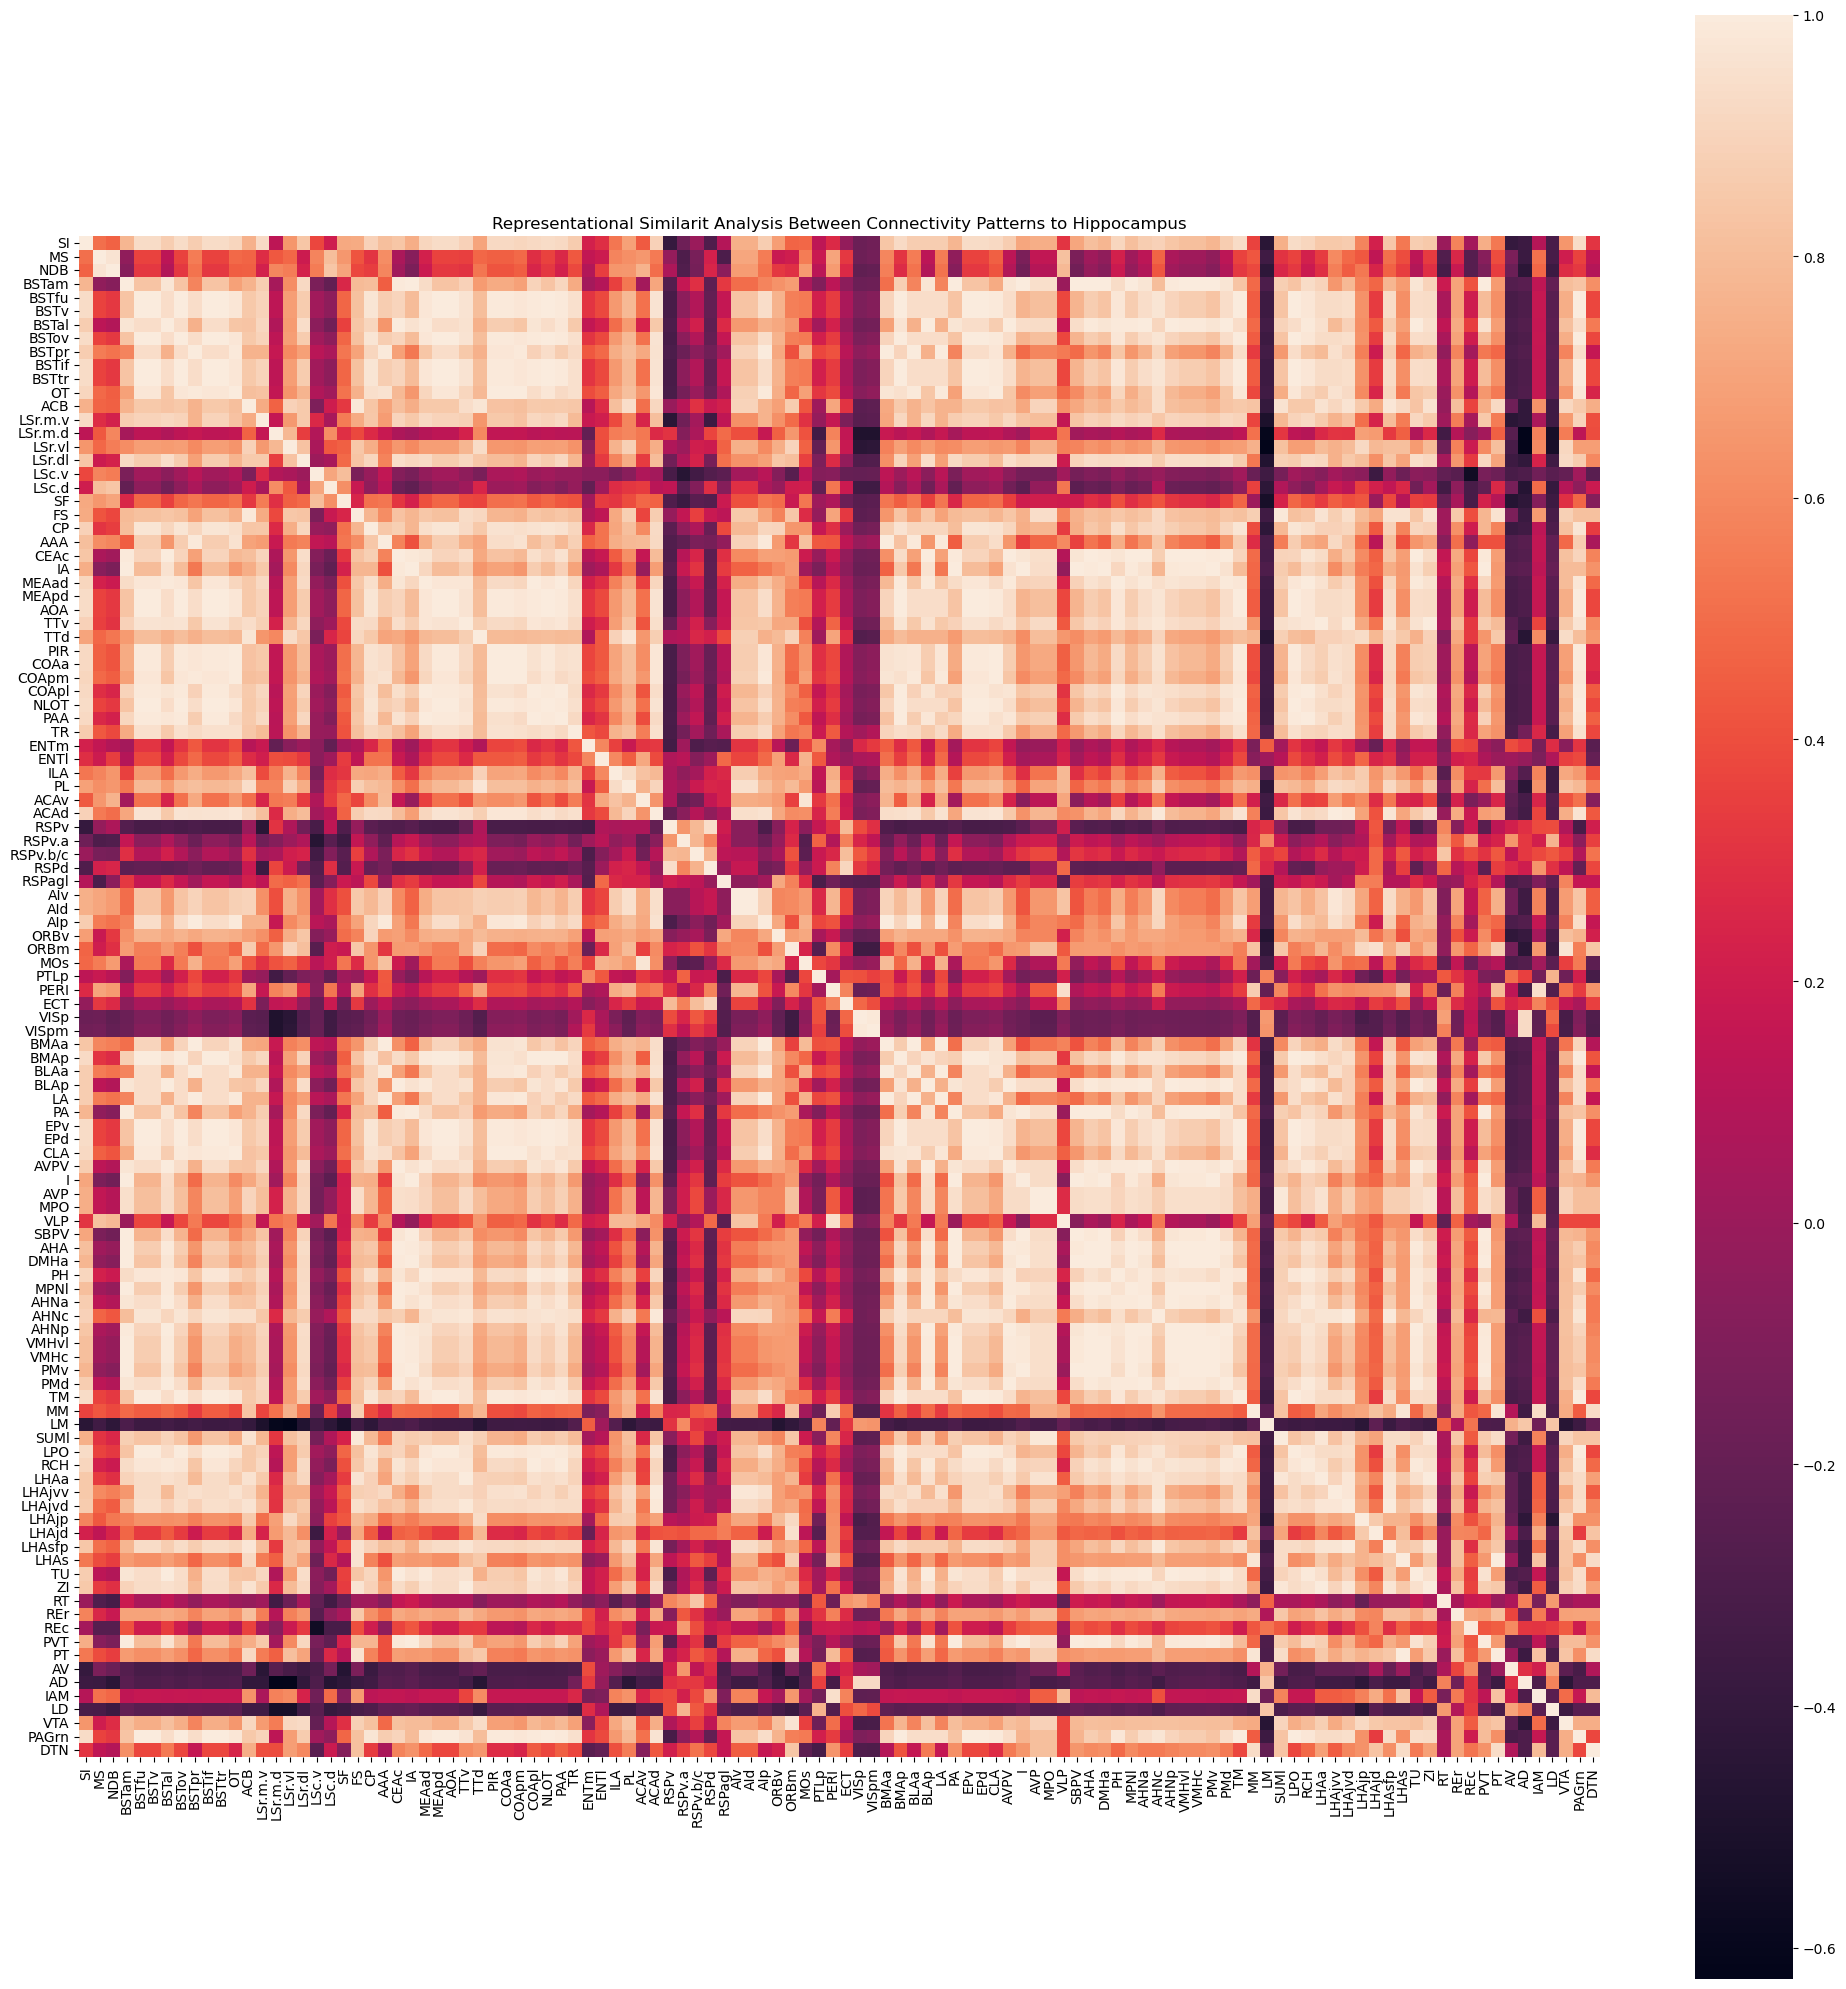

In [42]:
# plot heatmap of rsa using pearson correlation
plt.figure(figsize=(20, 20))
sns.heatmap(rsa_matrix, fmt=".2f", cbar=True, square=True, xticklabels=True, yticklabels=True)
plt.title("Representational Similarit Analysis Between Connectivity Patterns to Hippocampus")
plt.tight_layout()

# Save the heatmap as an SVG file
plt.savefig("../output/rsa_heatmap.svg", format="svg")

# Show the plot
plt.show()

In [48]:
# construct rsa matrix using euclidean distance
# Compute pairwise Euclidean distances between columns
distance_matrix = squareform(pdist(df_filtered.T, metric='euclidean'))

# Convert to a pandas DataFrame for better visualization
distance_df = pd.DataFrame(distance_matrix, index=df_filtered.columns, columns=df_filtered.columns)

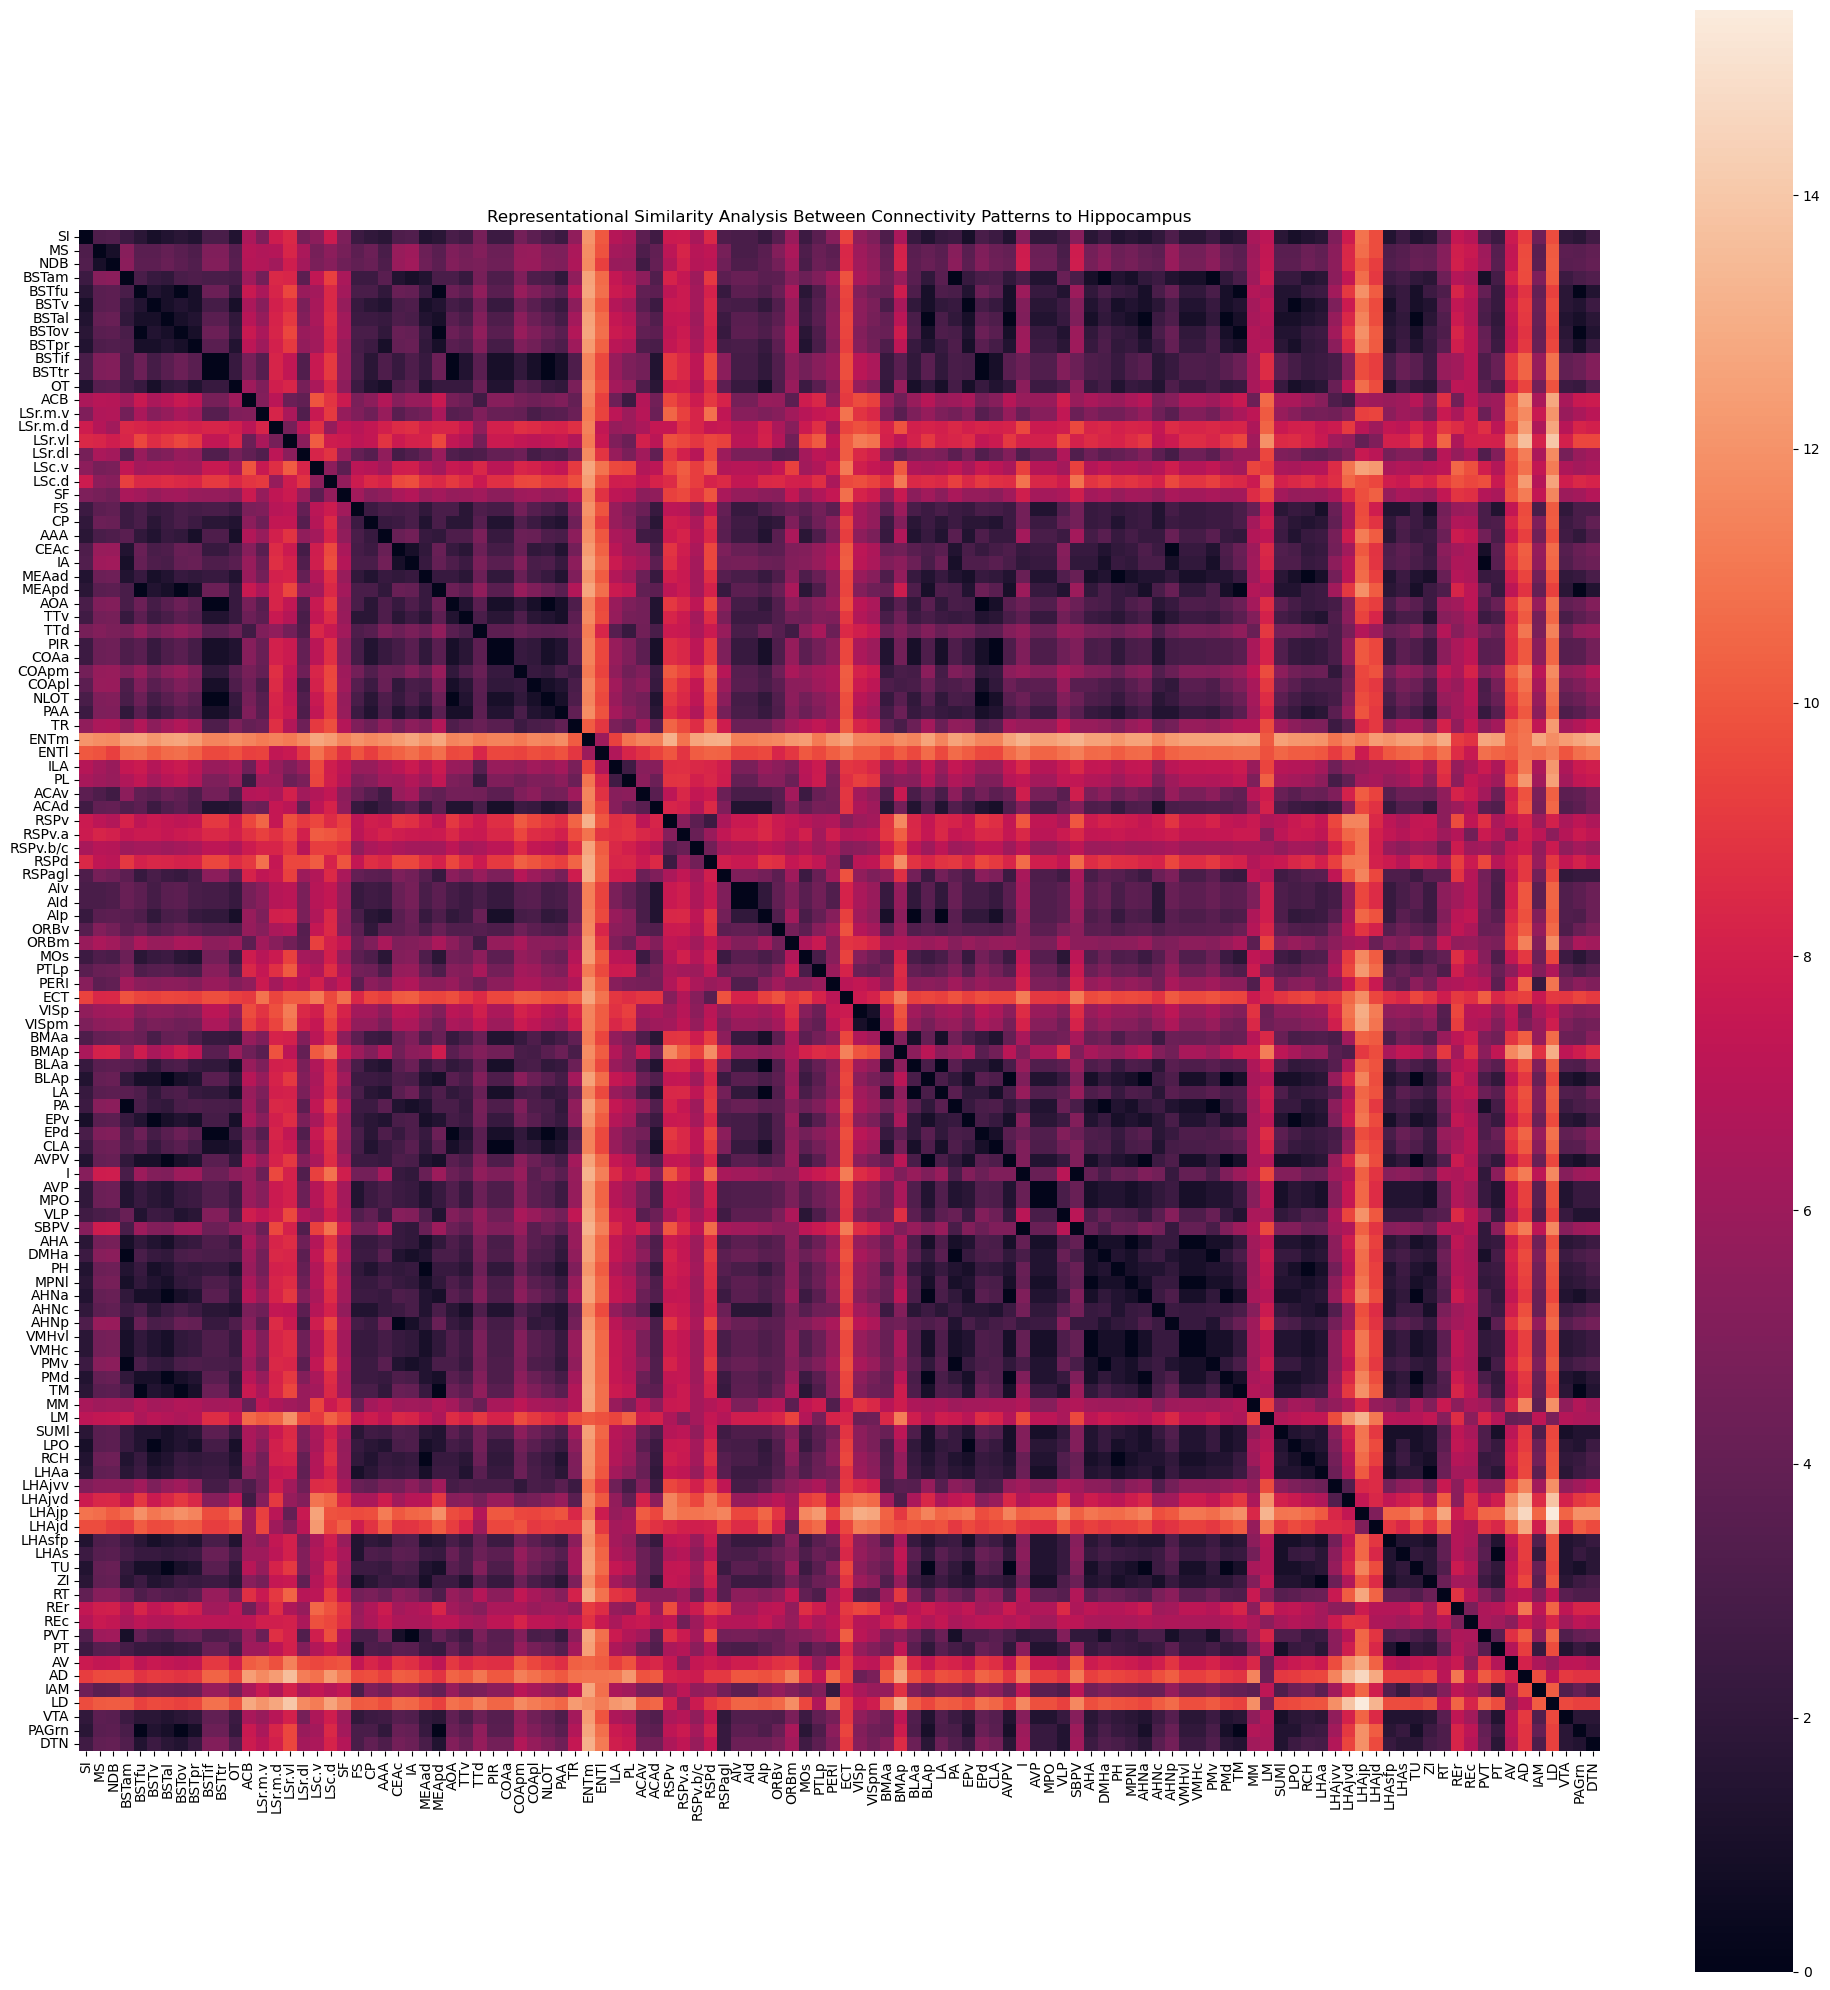

In [50]:
# plot heatmap of rsa using euclidean distance
plt.figure(figsize=(20, 20))
sns.heatmap(distance_df, fmt=".2f", cbar=True, square=True, xticklabels=True, yticklabels=True)
plt.title("Representational Similarity Analysis Between Connectivity Patterns to Hippocampus")
plt.tight_layout()

# Save the heatmap as an SVG file
plt.savefig("../output/rsa_heatmap_euclidean_distance.svg", format="svg")

# Show the plot
plt.show()